In [3]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl
%matplotlib inline

In [6]:
PATH = "Data"
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(PATH) for f in filenames if os.path.splitext(f)[1] == '.txt']
# Create pairs of consecutive files
file_pairs = [(all_files[i], all_files[i + 1]) for i in range(0,len(all_files) - 1, 2)]


In [7]:
def writeAnnotations(file_pair):
    meter = pd.read_csv(file_pair[0], sep=' ')
    annotation = pd.read_csv(file_pair[1], sep=' ')
    annotations = annotation.iloc[:, 0]
    #delete column annotation
    #create names for columns
    
    
    meter.columns = ['x1', 'y1', 'z1', 'x', 'y', 'z', 'x3', 'y3', 'z3']
    meter['annotation'] = 0
    #add names to 3,4,5 columns

    for c in annotations:
        meter.at[c, 'annotation'] = 1
    
    
    meter.to_csv(file_pair[0], sep=' ', index=False)

In [11]:
separateByComma(file_pairs[0][0])

In [48]:
for pair in file_pairs:
    writeAnnotations(pair)

In [9]:
def separateByComma(file):
    meter = pd.read_csv(file, sep=' ')
    meter.to_csv(file, sep=',', index=False)

In [59]:
for pair in file_pairs:
    separateByComma(pair[0])

In [40]:
def writeSheepAnnotations(file_pair):
    meter = pd.read_csv(file_pair[0]+"1", sep=',')
    annotation = pd.read_csv(file_pair[1], sep=',')
    annotations = annotation["content"]
    #row datetime to pandas datetime
    meter['datetime'] = pd.to_datetime(meter['datetime'], format='%M:%S.%f')
    #datetime to seconds
    meter['datetime'] = meter['datetime'].dt.minute*60 + meter['datetime'].dt.second + meter['datetime'].dt.microsecond/1e6
    
    
    #delete column annotation
    #create names for columns
    meter.columns = ['datetime', 'x', 'y', 'z', 'gyrx', 'gyry', 'gyrz', 'magx', 'magy', 'magz','annotation','a','b']
    meter['annotation'] = 0
    #add names to 3,4,5 columns

    for c in annotations:
        time = c

        row = meter[meter['datetime'] > time].index[0]
        print(row)
        meter.at[row, 'annotation'] = 1

    meter.to_csv(file_pair[0], sep=',', index=False)

In [41]:
writeSheepAnnotations(("Sheep/outputMax.csv", "Sheep/GroundMax.csv"))

1032
1092
1129
1219
1332
1392
1444
1482
1542
1594
1654
1692
1744
1819
1857
1894
1954
1992
2029
2082
2119
2179
2217
2292
2329
2382
2419
2457
2517
2569
2629
2682
2757
2794
2832
2869
2944
2982
3042
3117
3154
3192
3267
3319
3379
3582
3657
3694
3732
3769
3807
3882
4054
4371
4461
4498
4544
4586
4661
4736
4796
5428
6313
6466
6519
6565
6771
6844
6935
6935
6935
6935
7014
7360
7585
7871
7871
8290
8290
8328
8425
8515
8665
8725
9025
9078
9115
9232
9489
9564
9691
9787
10093
10130
10168
10228
10265
10265
10318
10505
10691
10728
10803
10803
10841
10901
11051
11141
11201
11238
11238
11238
11276
11291
11313
11364
11381
11396
11434
11507
11536
11571
11627
11660
11713
11773
11825
11862
11974
12184
12222
12407
12534
12631
12833
13005
13095
13155
13193
13230
13267
13304
13319
13379
13417
13566
13626
13641
13678
13713
13735
13788
13885
13944
13955
14011
14064
14086
14124
14161
14236
14430
14468
14505
14580
14617
14654
14707
14729
14767
14842
14917
14917
14954
15007
15081
15118
15156
15178
15216
15253
15305


In [11]:
meter = pd.read_csv("Sheep/outputMax.csv", sep=',')

In [39]:
meter.head()

,datetime,accx,accy,accz,gyrx,gyry,gyrz,magx,magy,magz
0,2024-03-30 16:29:12.000,0.776611,0.293945,0.569580,0.0,0.808716,0.625610,-34.935775,-16.343346,-62.524542
1,2024-03-30 16:29:12.013,0.775635,0.294678,0.562744,0.0,1.296997,1.052856,-34.935775,-16.343346,-62.524542
2,2024-03-30 16:29:12.027,0.768311,0.293945,0.556396,0.0,1.831055,1.220703,-34.935775,-16.343346,-62.524542
3,2024-03-30 16:29:12.040,0.753906,0.280762,0.556641,0.0,2.212524,1.159668,-34.935775,-16.343346,-62.524542
4,2024-03-30 16:29:12.053,0.750244,0.275146,0.558105,0.0,1.998901,0.793457,-34.935775,-16.343346,-62.524542


In [22]:
def chart(data_in):
    (calculated, expected, accelerometer) = data_in
    x=range(len(accelerometer))
    y=accelerometer
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('index')
    plt.ylabel('magnitude')
    #show x label every 800
    plt.xticks(x[::500])
    plt.xticks(rotation=90)
    #add rectangles
    for e in expected:
        plt.axvline(x =e, color ='g', label ='axvline - full height', ymin=0.5, alpha=0.1)
    for c in calculated:
        plt.axvline(x =c, color ='b', label ='axvline - full height', ymax=0.5, alpha=0.1)
    plt.show()

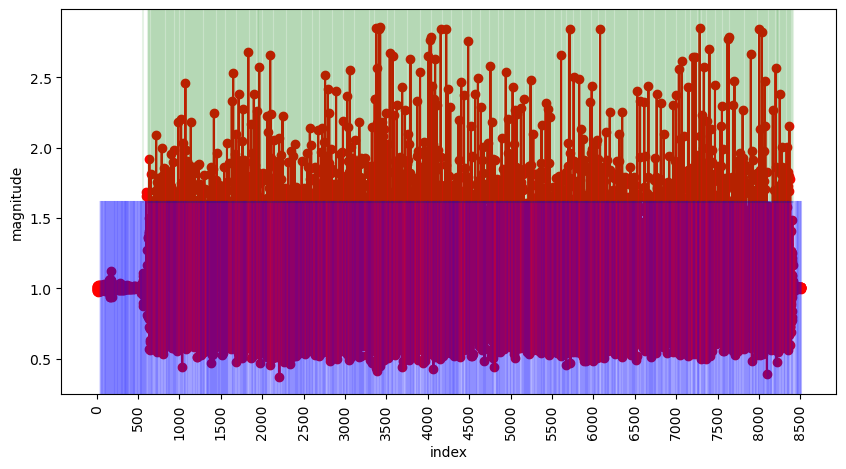

In [24]:
chart(getSteps(file_pairs[1]))

In [30]:
differences = []
i = 0
for pair in file_pairs:
    (calculated1, expected1, _) = getSteps(pair)
    differences.append(len(expected1) - len(calculated1))
    print(i, len(expected1), len(calculated1), pair[0])
    i += 1
print(differences) 

0 198 213 Data\P001\Irregular\P001_Irregular.txt
1 936 993 Data\P001\Regular\P001_Regular.txt
2 702 607 Data\P001\SemiRegular\P001_Semiregular.txt
3 216 288 Data\P002\Irregular\P002_Irregular.txt
4 1223 1147 Data\P002\Regular\P002_Regular.txt
5 646 521 Data\P002\SemiRegular\P002_Semiregular.txt
6 223 247 Data\P003\Irregular\P003_Irregular.txt
7 1052 1063 Data\P003\Regular\P003_Regular.txt
8 715 678 Data\P003\SemiRegular\P003_Semiregular.txt
9 227 241 Data\P004\Irregular\P004_Irregular.txt
10 1100 1231 Data\P004\Regular\P004_Regular.txt
11 613 557 Data\P004\SemiRegular\P004_Semiregular.txt
12 216 291 Data\P005\Irregular\P005_Irregular.txt
13 1043 1197 Data\P005\Regular\P005_Regular.txt
14 667 783 Data\P005\SemiRegular\P005_Semiregular.txt
15 194 235 Data\P006\Irregular\P006_Irregular.txt
16 913 910 Data\P006\Regular\P006_Regular.txt
17 700 718 Data\P006\SemiRegular\P006_Semiregular.txt
18 222 393 Data\P007\Irregular\P007_Irregular.txt
19 1228 1373 Data\P007\Regular\P007_Regular.txt
20 7

In [31]:
%matplotlib qt
chart(getSteps(file_pairs[76]))